In [1015]:
import  pandas as pd

In [1016]:
data=pd.read_csv('wine_cleared.csv')
wine_cleared=data.copy()

✍️ Создадим новый признак price_round, означающий округлённую до целого числа цену за бутылку вина:

In [1017]:
# для удобства сразу преобразуем признак в int
data['price_round'] = data['price'].round().astype(int)
data['price_round'].head()

0    35
1    15
2    14
3    13
4    65
Name: price_round, dtype: int64

In [1018]:

regex = '\d{4}' # регулярное выражение для нахождения чисел
data['year'] = data['title'].str.findall(regex).str.get(0)
data['year']


0         2013
1         2011
2         2013
3         2013
4         2012
          ... 
129966    2013
129967    2004
129968    2013
129969    2012
129970    2012
Name: year, Length: 129971, dtype: object

In [1019]:
data['country'].value_counts()[1:3]

country
France    22093
Italy     19540
Name: count, dtype: int64

* новый бинарный признак is_usa и присвоить ему 1 в случае, если вино произведено в США, иначе — 0.

In [1020]:
data['is_usa'] = data['country'].apply(lambda x:  1 if x=='US'  else 0)


In [1021]:
data['is_usa'].value_counts()

is_usa
0    75467
1    54504
Name: count, dtype: int64

* 2.2 Создайте бинарные признаки is_france, is_italy наподобие признака is_usa.

In [1022]:
data['is_france'] = data['country'].apply(lambda x: 1 if x=='France' else 0)
data['is_italy'] = data['country'].apply(lambda x: 1 if x=='Italy' else 0)

In [1023]:
data['is_france'].sum()

22093

In [1024]:
data['is_italy'].sum()

19540

* 2.3 Создайте новый бинарный признак old_wine, где значение 1 будет обозначать, что вино старше 2010 года.

In [1025]:
data['year'] = pd.to_datetime(data['year'], errors='coerce')

In [1026]:
data['year']

0        2013-01-01
1        2011-01-01
2        2013-01-01
3        2013-01-01
4        2012-01-01
            ...    
129966   2013-01-01
129967   2004-01-01
129968   2013-01-01
129969   2012-01-01
129970   2012-01-01
Name: year, Length: 129971, dtype: datetime64[ns]

In [1027]:
data['old_wine'] = data['year'].apply(lambda x: 1 if x.year < 2010 else 0) 

In [1028]:
data['old_wine'].sum()

39765

* 2.7 Создайте новый признак locality из признака title, который будет обозначать название долины/местности производства вина.
Например, в названии вина Rainstorm 2013 Pinot Gris (Willamette Valley) locality будет Willamette Valley. В названии Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra) — Navarra.

In [1029]:
regex = '\((.*?)\)'
data['locality'] = data['title'].str.findall(regex).str.get(0)
data['locality']

0                           Etna
1                          Douro
2              Willamette Valley
3            Lake Michigan Shore
4              Willamette Valley
                   ...          
129966    Erben Müller-Burggraef
129967                    Oregon
129968                    Alsace
129969                    Alsace
129970                    Alsace
Name: locality, Length: 129971, dtype: object

In [1030]:
data['title'].head()

0                    Nicosia 2013 Vulkà Bianco  (Etna)
1        Quinta dos Avidagos 2011 Avidagos Red (Douro)
2        Rainstorm 2013 Pinot Gris (Willamette Valley)
3    St. Julian 2013 Reserve Late Harvest Riesling ...
4    Sweet Cheeks 2012 Vintner's Reserve Wild Child...
Name: title, dtype: object

In [1031]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             129971 non-null  int64         
 1   country                129908 non-null  object        
 2   description            129971 non-null  object        
 3   designation            129971 non-null  object        
 4   points                 129971 non-null  int64         
 5   price                  129971 non-null  float64       
 6   province               129908 non-null  object        
 7   region_1               129971 non-null  object        
 8   taster_name            129971 non-null  object        
 9   taster_twitter_handle  129971 non-null  object        
 10  title                  129971 non-null  object        
 11  variety                129970 non-null  object        
 12  winery                 129971 non-null  obje

In [1032]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://rosstat.gov.ru/labor_market_employment_salaries' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text)

<title>Росстат — Рынок труда, занятость и заработная плата</title>
Росстат — Рынок труда, занятость и заработная плата


In [1033]:
country_population=pd.read_csv('country_population.zip',sep=';')

In [1034]:
country_population[country_population['country']=='Italy']['population']

24    59,097,904
Name: population, dtype: object

In [1035]:
data=data.join(country_population.set_index('country'),on='country')

In [1036]:
country_area=pd.read_csv('country_area.zip',sep=';')

In [1037]:
data=data.join(country_area.set_index('country'),on='country')

In [1038]:
data[data['title']== 'Gård 2014 Grand Klasse Reserve Lawrence Vineyards Viognier (Columbia Valley (WA))']['area']

94    9372610.0
Name: area, dtype: float64

* ✍️ Давайте теперь приступим к практическим заданиям. В следующих заданиях мы будем использовать срез базы данных из колл-центра. Компания хочет предсказывать, какому из клиентов стоит звонить сегодня, а какому — нет.

* Давайте рассмотрим, из каких признаков состоит срез данных:

* client_id — идентификатор клиента в базе;
* agent_date — время соединения с агентом;
* created_at — время соединения с клиентом (начало разговора);
* end_date — время окончания соединения с клиентом (конец разговора).

In [1039]:
import pandas as pd 

# инициализируем информацию о звонках
calls_list = [
    [460, '2013-12-17 04:55:39', '2013-12-17 04:55:44', '2013-12-17 04:55:45'],
    [12, '2013-12-16 20:03:20', '2013-12-16 20:03:22', '2013-12-16 20:07:13'],
    [56, '2013-12-16 20:03:20', '2013-12-16 20:03:20', '2013-12-16 20:05:04'],
    [980, '2013-12-16 20:03:20','2013-12-16 20:03:27', '2013-12-16 20:03:29'],
    [396, '2013-12-16 20:08:27', '2013-12-16 20:08:28','2013-12-16 20:12:03'],
    [449, '2013-12-16 20:03:20', '2013-12-16 20:03:25','2013-12-16 20:05:00'],
    [397, '2013-12-16 20:08:25', '2013-12-16 20:08:27', '2013-12-16 20:09:59'],
    [398, '2013-12-16 20:01:23', '2013-12-16 20:01:23', '2013-12-16 20:04:58'],
    [452, '2013-12-16 20:03:20', '2013-12-16 20:03:21','2013-12-16 20:04:55'],
    [440, '2013-12-16 20:03:20', '2013-12-16 20:04:26', '2013-12-16 20:04:32']
]

calls = pd.DataFrame(calls_list, columns = ['client_id',  'agent_date', 'created_at' ,'end_date'])

# преобразовываем признаки в формат datetime для удобной работы

calls['agent_date'] = pd.to_datetime(calls['agent_date'])
calls['created_at'] = pd.to_datetime(calls['created_at'])
calls['end_date'] = pd.to_datetime(calls['end_date'])

calls

,client_id,agent_date,created_at,end_date
0,460,2013-12-17 04:55:39,2013-12-17 04:55:44,2013-12-17 04:55:45
1,12,2013-12-16 20:03:20,2013-12-16 20:03:22,2013-12-16 20:07:13
2,56,2013-12-16 20:03:20,2013-12-16 20:03:20,2013-12-16 20:05:04
3,980,2013-12-16 20:03:20,2013-12-16 20:03:27,2013-12-16 20:03:29
4,396,2013-12-16 20:08:27,2013-12-16 20:08:28,2013-12-16 20:12:03
5,449,2013-12-16 20:03:20,2013-12-16 20:03:25,2013-12-16 20:05:00
6,397,2013-12-16 20:08:25,2013-12-16 20:08:27,2013-12-16 20:09:59
7,398,2013-12-16 20:01:23,2013-12-16 20:01:23,2013-12-16 20:04:58
8,452,2013-12-16 20:03:20,2013-12-16 20:03:21,2013-12-16 20:04:55
9,440,2013-12-16 20:03:20,2013-12-16 20:04:26,2013-12-16 20:04:32


* Подсчитаем разницу между датой и временем начала разговора с клиентом и датой и временем окончания звонка.

In [1040]:
calls['duration'] = (calls['end_date']-calls['created_at']).dt.seconds
calls['duration']


0      1
1    231
2    104
3      2
4    215
5     95
6     92
7    215
8     94
9      6
Name: duration, dtype: int32

* 4.1 Подсчитайте, сколько секунд тратят сотрудники компании на дозвон клиенту. Результат запишите в новый признак time_connection.
В ответ запишите результат выполнения следующего кода: calls['time_connection'].sum().

In [1041]:
calls['time_connection']=(calls['created_at']-calls['agent_date']).dt.seconds
calls['time_connection'].sum()

89

* 4.2 Создайте новый признак is_connection — факт соединения с клиентом. Признак будет равен 1 в случае, если разговор состоялся и продлился больше 10 секунд, иначе — 0. В ответ запишите результат выполнения следующего кода: calls['is_connection'].sum().

In [1042]:
calls['is_connection'] = calls['duration'].apply(lambda x: 1 if x>10 else 0)
calls['is_connection'].sum()

7

* 4.3 Создайте признак time_diff — разницу в секундах между началом звонка(не разговора) и его окончанием. В ответ запишите результат выполнения следующего кода: calls['time_diff'].sum().

In [1043]:
calls['time_diff']=(calls['end_date']-calls['agent_date']).dt.seconds
calls['time_diff'].sum()

1144

* Итак, мы получили четыре новых признака для нашего набора данных: duration, time_connection, is_connection, time_diff. После генерации признаков из дат исходные признаки agent_date, created_at, end_date нам больше не нужны — передать на вход модели мы им не сможем, так как большинство моделей машинного обучения умеют работать только с числами, даты и текст ей недоступны, поэтому удалим их:

In [1044]:
calls=calls.drop(columns=['agent_date', 'created_at' ,'end_date'], axis=1)

* 4.5 Создайте признак количество дней с момента произведения вина — years_diff для датасета винных обзоров. За дату отсчёта возьмите 12 января 2022 года. В ответ впишите максимальное количество дней с момента произведения вина. Ответ округлите до целого числа.

In [1045]:
data['year']=pd.to_datetime(data['year'],errors='coerce')  
data['years_diff']=(pd.to_datetime('2022-01-12')-data['year']).dt.days
data['years_diff'].max()


98627.0

* Импортируем библиотеку category-encoders для дальнейшего использования. 

In [1046]:
import category_encoders as ce

* Создадим обучающий набор для кодирования порядковых признаков — ассортимент небольшого магазина с одеждой, где size — буквенное обозначение размера одежды, type — тип изделия.

In [1047]:
import pandas as pd
# инициализируем информацию об одежде
clothing_list = [
    ['xxs', 'dress'],
    ['xxs', 'skirt'],
    ['xs', 'dress'],
    ['s', 'skirt'],
    ['m', 'dress'],
    ['l', 'shirt'],
    ['s', 'coat'],
    ['m', 'coat'],
    ['xxl', 'shirt'],
    ['l', 'dress']
]

clothing = pd.DataFrame(clothing_list, columns = ['size',  'type'])
clothing

,size,type
0,xxs,dress
1,xxs,skirt
2,xs,dress
3,s,skirt
4,m,dress
5,l,shirt
6,s,coat
7,m,coat
8,xxl,shirt
9,l,dress


In [1048]:
# импортируем библиотеку для работы с кодировщиками
import category_encoders as ce 

# создаем объект OrdinalEncoder, col - имя столбца, mapping - словарь с описанием кодировки
ord_encoder = ce.OrdinalEncoder(mapping=[{
	'col': 'size',
	'mapping': {'xxs': 1, 'xs': 2, 's': 3, 
                'm': 4, 'l': 5, 'xxl': 6}
}])

# применяем трансформацию к столбцу
data_bin = ord_encoder.fit_transform(clothing['size'])
data_bin
# добавляем результат к исходному DataFrame
clothing = pd.concat([clothing, data_bin], axis=1)

clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [1049]:
clothing

,size,type,size
0,xxs,dress,1
1,xxs,skirt,1
2,xs,dress,2
3,s,skirt,3
4,m,dress,4
5,l,shirt,5
6,s,coat,3
7,m,coat,4
8,xxl,shirt,6
9,l,dress,5


In [1050]:
data=data.sort_values(by='year',ascending=False)

In [1051]:
import category_encoders as ce
encoder=ce.OrdinalEncoder(cols='year')
year_encoder=encoder.fit_transform(data['year'])
data=pd.concat([data,year_encoder],axis=1)
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
29749,29749,Argentina,Lightly vegetal aromas of asparagus and canned...,Sustainably Farmed Estate Grown and Bottled,84,11.0,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
1634,1634,Argentina,This youthful pink-colored number smells of du...,Sustainably Farmed Estate Grown and Bottled,85,10.0,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
15751,15751,Uruguay,Beautifully composed white-flower and citrus a...,unknown,91,25.0,Montevideo,unknown,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Montevideo,"3,554,915",176220.0,1837.0,1
1618,1618,Argentina,Tropical aromas of lychee and honeydew set up ...,Sustainably Farmed Estate Grown and Bottled,85,10.0,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
98608,98608,Argentina,Lightly oaked melon aromas are easygoing. This...,Made With Organic Grapes,86,13.0,Mendoza Province,Tupungato,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Tupungato,"45,808,747",2760990.0,1837.0,1


* Закодируем признак type в Python. Используем класс OneHotEncoding библиотеки category_encoders. Укажем в cols наименование признака type для кодировки, иначе будут закодированы все строковые столбцы.

In [1052]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['type'],use_cat_names='True')
type_bin=encoder.fit_transform(clothing['type'])
clothing=pd.concat([clothing,type_bin],axis=1)
clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat
0,xxs,dress,1,1,0,0,0
1,xxs,skirt,1,0,1,0,0
2,xs,dress,2,1,0,0,0
3,s,skirt,3,0,1,0,0
4,m,dress,4,1,0,0,0
5,l,shirt,5,0,0,1,0
6,s,coat,3,0,0,0,1
7,m,coat,4,0,0,0,1
8,xxl,shirt,6,0,0,1,0
9,l,dress,5,1,0,0,0


In [1053]:
clothing_dummies = pd.get_dummies(clothing, columns=['type'])
clothing_dummies

,size,size,type_dress,type_skirt,type_shirt,type_coat,type_coat,type_dress,type_shirt,type_skirt
0,xxs,1,1,0,0,0,False,True,False,False
1,xxs,1,0,1,0,0,False,False,False,True
2,xs,2,1,0,0,0,False,True,False,False
3,s,3,0,1,0,0,False,False,False,True
4,m,4,1,0,0,0,False,True,False,False
5,l,5,0,0,1,0,False,False,True,False
6,s,3,0,0,0,1,True,False,False,False
7,m,4,0,0,0,1,True,False,False,False
8,xxl,6,0,0,1,0,False,False,True,False
9,l,5,1,0,0,0,False,True,False,False


* 5.4 В нашем наборе данных винных обзоров признак, обозначающий имя сомелье (taster_name), является номинальным. Закодируйте его, используя One-Hot Encoding.
В ответе напишите, сколько признаков добавилось после применения кодирования.

In [1054]:
import category_encoders as ce
encoder=ce.OneHotEncoder(cols=['taster_name'],use_cat_names=True)
col_bin=encoder.fit_transform(data['taster_name'])
data_new=pd.concat([data,col_bin],axis=1)


In [1055]:
print(len(data_new.columns)-len(data.columns) )

20


* Вернёмся к примеру с магазином одежды. Закодируем бинарным способом признак type в Python. Используем класс BinaryEncoder библиотеки category_encoders.

In [1056]:
import category_encoders as ce # импорт для работы с кодировщиком
bin_encoder = ce.BinaryEncoder(cols=['type']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(clothing['type'])
clothing = pd.concat([clothing, type_bin], axis=1)

clothing

,size,type,size,type_dress,type_skirt,type_shirt,type_coat,type_0,type_1,type_2
0,xxs,dress,1,1,0,0,0,0,0,1
1,xxs,skirt,1,0,1,0,0,0,1,0
2,xs,dress,2,1,0,0,0,0,0,1
3,s,skirt,3,0,1,0,0,0,1,0
4,m,dress,4,1,0,0,0,0,0,1
5,l,shirt,5,0,0,1,0,0,1,1
6,s,coat,3,0,0,0,1,1,0,0
7,m,coat,4,0,0,0,1,1,0,0
8,xxl,shirt,6,0,0,1,0,0,1,1
9,l,dress,5,1,0,0,0,0,0,1


* Вернёмся к нашему примеру с винным датасетом (файл wine_cleared.csv), который мы будем использовать в его исходном виде. Признак country содержит много уникальных значений — используем двоичную кодировку признака.

In [1057]:
bin_decoder=ce.BinaryEncoder(cols=['country'])
con_decoder=bin_decoder.fit_transform(wine_cleared['country'])
wine_cleared_new=pd.concat([wine_cleared,con_decoder],axis=1)
display(len(wine_cleared_new.columns)-len(wine_cleared.columns))
wine_cleared_new['country'].nunique()

6

43

* На основе изученного материала определите подходящий способ кодирования признака taster_twitter_handle из датасета винных обзоров и закодируйте его.
В ответе напишите, сколько признаков добавилось после применения кодирования.

In [1058]:
encoder_twitter=ce.BinaryEncoder(cols=['taster_twitter_handle'])
col_twitter=encoder_twitter.fit_transform(wine_cleared['taster_twitter_handle'])
col_twitter




,taster_twitter_handle_0,taster_twitter_handle_1,taster_twitter_handle_2,taster_twitter_handle_3,taster_twitter_handle_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,1,0,0
4,0,0,0,1,1
...,...,...,...,...,...
129966,0,0,1,0,0
129967,0,0,0,1,1
129968,0,0,0,1,0
129969,0,0,0,1,0


* 5.9 Используйте следующий датафрейм для задания:
* Определите типы признаков и закодируйте их в соответствии с изученными способами.

In [1059]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)
df

,product,price,payment_type,product_0,product_1,payment_type_0,payment_type_1
0,Product1,1200,Mastercard,0,1,0,1
1,Product2,3600,Visa,1,0,1,0
2,Product3,7500,Amex,1,1,1,1


In [1060]:
list_of_dicts = [
 {'product': 'Product1', 'price': 1200, 'payment_type': 'Mastercard'},
 {'product': 'Product2', 'price': 3600, 'payment_type': 'Visa'},
 {'product': 'Product3', 'price': 7500, 'payment_type': 'Amex'}
]
df = pd.DataFrame(list_of_dicts)

import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['product','payment_type'])
cols = encoder.fit_transform(df[['product','payment_type']])
df = pd.concat([df, cols], axis=1)
df

,product,price,payment_type,product_1,product_2,product_3,payment_type_1,payment_type_2,payment_type_3
0,Product1,1200,Mastercard,1,0,0,1,0,0
1,Product2,3600,Visa,0,1,0,0,1,0
2,Product3,7500,Amex,0,0,1,0,0,1


#### <center> ПРЕОБРАЗОВАНИЕ ДАННЫХ </center>

#####  <center> НОРМАЛИЗАЦИЯ </center>

##### Используем библиотеку numpy для создания массивов случайных чисел различных распределений. Выполните этот код, чтобы создать обучающий набор различных распределений:

In [1061]:
import numpy as np 
import pandas as pd

np.random.seed(34)

In [1062]:
# для нормализации, стандартизации
from sklearn import preprocessing

In [1063]:
# Для графиков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')

In [1064]:
# сгенерируем датасет из случайных чисел
df = pd.DataFrame({ 
    # Бета распределение, 5 – значение альфа, 1 – значение бета, 1000 – размер
    'beta': np.random.beta(5, 1, 1000) * 60,
    
    # Экспоненциальное распределение, 10 – "резкость" экспоненты, 1000 – размер
    'exponential': np.random.exponential(10, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 2 – стандартное отклонение, 1000 – количество сэмплов
    'normal_p': np.random.normal(10, 2, 1000),
    
    # Нормальное распределение, 10 – среднее значение р., 10 – стандартное отклонение, 1000 – количество сэмплов
    'normal_l': np.random.normal(10, 10, 1000),
})

# Копируем названия столбцов, которые теряются при использовании fit_transform()
col_names = list(df.columns)

In [1065]:
df

,beta,exponential,normal_p,normal_l
0,39.273740,2.263890,11.860245,4.748207
1,55.030395,13.108592,11.796582,10.959172
2,47.434682,3.312019,11.146945,3.919227
3,43.173536,17.664301,8.266689,42.072915
4,45.681443,2.109760,5.112983,16.960664
...,...,...,...,...
995,50.976583,3.748883,7.057497,9.609427
996,46.290172,1.195512,8.419497,14.972852
997,58.912029,7.014868,11.541732,33.654934
998,52.185621,2.391140,11.819914,6.091417


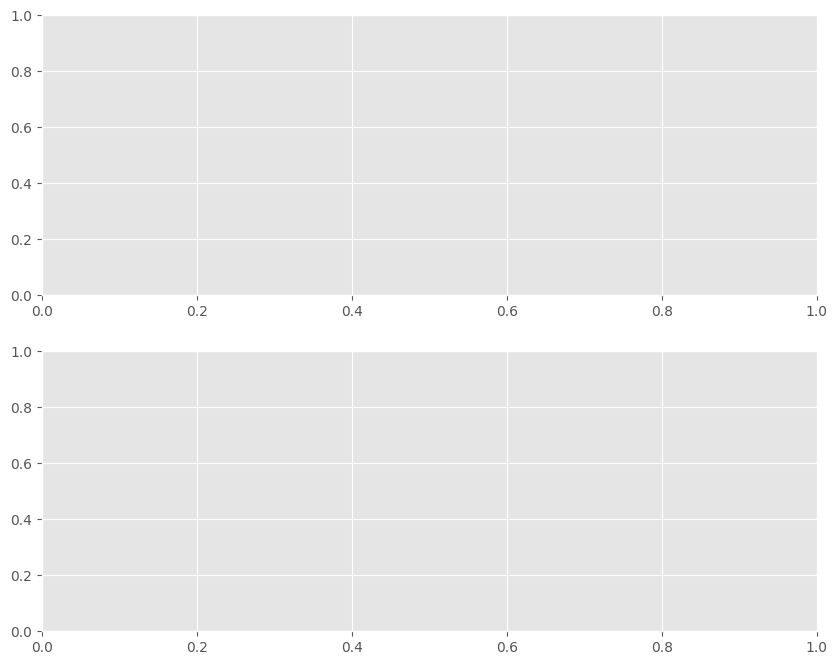

In [1066]:
fig, (ax1) = plt.subplots(nrows=2,ncols=1, figsize=(10, 8))

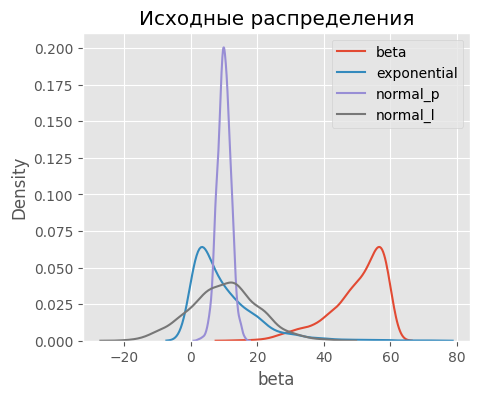

In [1067]:
# зададим параметры холста, название и визуализируем кривые распределения:
fig, (ax1) = plt.subplots(ncols=1, figsize=(5, 4))
ax1.set_title('Исходные распределения')

# kdeplot() (KDE – оценка плотности ядра) – специальный метод для графиков распределений
sns.kdeplot(df['beta'], ax=ax1, label ='beta')
sns.kdeplot(df['exponential'], ax=ax1, label ='exponential')
sns.kdeplot(df['normal_p'], ax=ax1, label ='normal_p')
sns.kdeplot(df['normal_l'], ax=ax1, label ='normal_l')
plt.legend()

In [1068]:
df.describe()

,beta,exponential,normal_p,normal_l
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.024249,10.028387,9.994006,10.175745
std,8.474545,9.733928,2.013971,10.104004
min,13.854022,0.007617,2.356844,-19.539980
25%,45.793283,2.951421,8.687478,3.566822
50%,52.337504,7.018565,9.983498,10.326331
75%,56.722191,14.022485,11.306914,16.615057
max,59.990640,71.344341,16.214364,42.072915


<Axes: title={'center': 'После нормализации MinMaxScaler'}, xlabel='beta', ylabel='Density'>

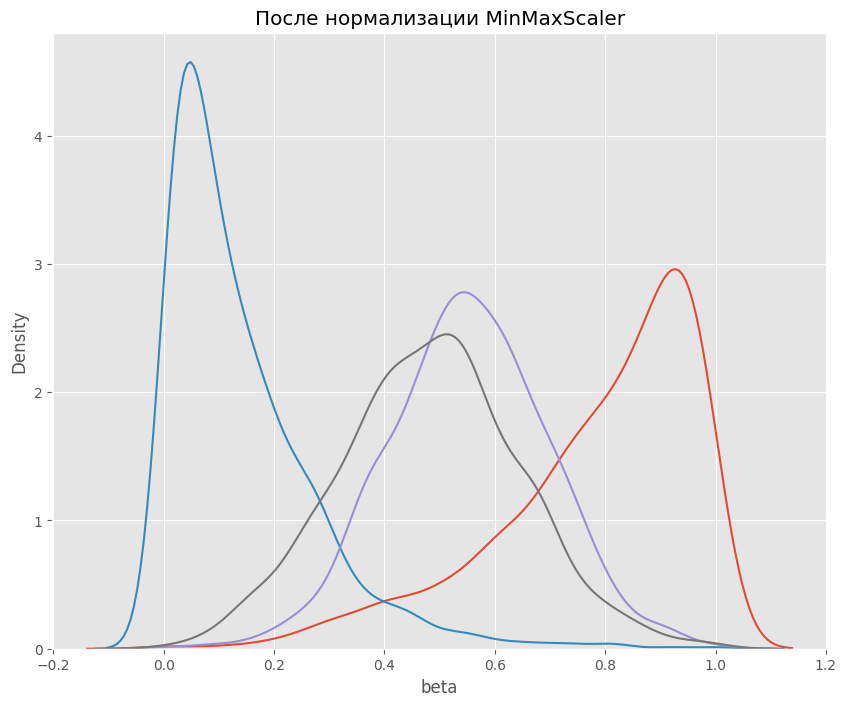

In [1069]:
mm_scaler = preprocessing.MinMaxScaler()

# кодируем исходный датасет
df_mm = mm_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('После нормализации MinMaxScaler')

sns.kdeplot(df_mm['beta'], ax=ax1)
sns.kdeplot(df_mm['exponential'], ax=ax1)
sns.kdeplot(df_mm['normal_p'], ax=ax1)
sns.kdeplot(df_mm['normal_l'], ax=ax1)

In [1070]:
a=[1,2,3,4,5]
np.std(a)

1.4142135623730951

In [1071]:
import statistics
a=[1,2,3,4,5]
statistics.stdev(a)

1.5811388300841898

* Продолжим использовать обучающий пример, сгенерированный нами при изучении нормализации данных. Стандартизируем признаки в исходном наборе данных.

<Axes: title={'center': 'Распределения после StandardScaler'}, xlabel='beta', ylabel='Density'>

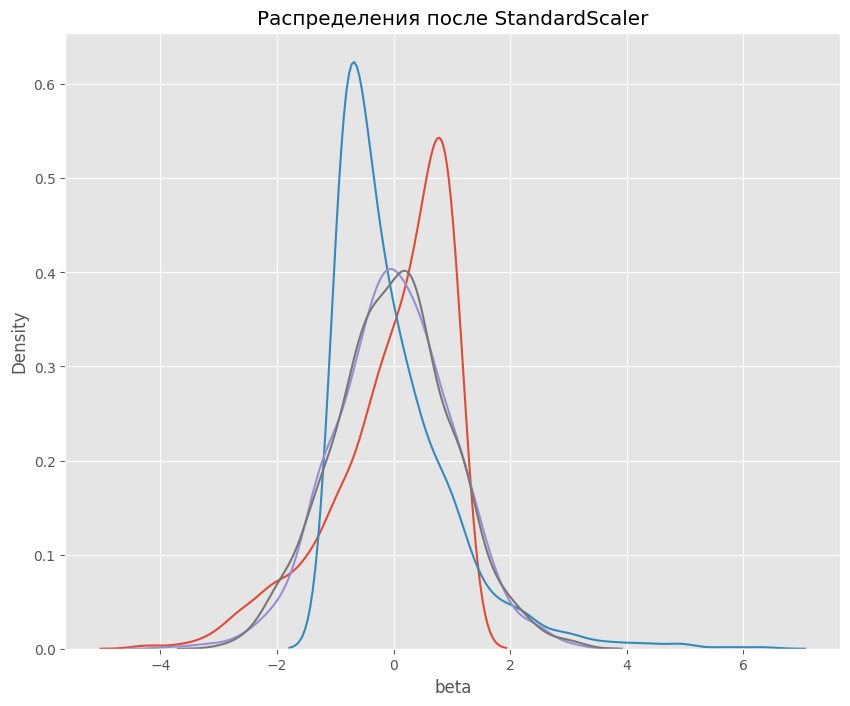

In [1072]:
# инициализируем стандартизатор StandardScaler
s_scaler = preprocessing.StandardScaler()

# кодируем исходный датасет
df_s = s_scaler.fit_transform(df)

# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_s = pd.DataFrame(df_s, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Распределения после StandardScaler')

sns.kdeplot(df_s['beta'], ax=ax1)
sns.kdeplot(df_s['exponential'], ax=ax1)
sns.kdeplot(df_s['normal_p'], ax=ax1)
sns.kdeplot(df_s['normal_l'], ax=ax1)

* Нормализуйте признак price. Выберите подходящий тип нормализации, учитывая тот факт, что в данных присутствуют вина с выбросной стоимостью.
В ответе напишите результат выполнения кода data['price'].sum(), округлённый до целого.

In [1073]:

scaler_price_robust=preprocessing.RobustScaler()
data_1=scaler_price_robust.fit_transform(data[['price']])


In [1074]:
data_1.sum().round(2)

43500.77

* Стандартизируйте исходный признак price. В ответе напишите результат выполнения кода data['price'][129968]. Ответ округлите до сотых.

In [1075]:
scaled_s=preprocessing.StandardScaler()
data['price']=scaled_s.fit_transform(data[['price']])
data['price'][129968].round(2)


-0.14

* Данные содержат 150 экземпляров ириса, по 50 экземпляров трех видов — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

* sepal length — длина наружной доли околоцветника;
* sepal width — ширина наружной доли околоцветника;
* petal length — длина внутренней доли околоцветника;
*  petal width — ширина внутренней доли околоцветника.
*  ✍️ На основании этого набора данных требуется построить модель, определяющую вид растения по данным измерений. 

In [1076]:
import pandas as pd

iris = pd.read_csv('iris.csv')
iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


* Будем исследовать признаки, которые могут влиять на variety — sepal.length, sepal.width, petal.length, petal.width.
Проведём корреляционный анализ датасета и используем для этого тепловую карту корреляций признаков.

In [1077]:
iris=iris.drop(['petal.length'],axis=1)

<Axes: >

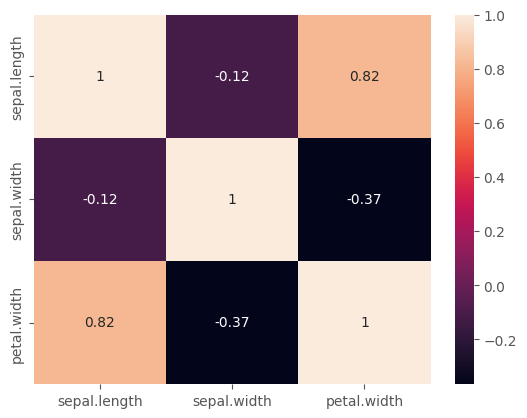

In [1078]:

sns.heatmap(iris.corr(numeric_only=True),annot=True)

In [1079]:
iris = iris.drop(['petal.width'], axis=1)

In [1080]:
iris

,sepal.length,sepal.width,variety
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


In [1081]:
iris.columns=['_Длина наружной доли','_Ширина наружной доли','тип']

In [1082]:
iris

,_Длина наружной доли,_Ширина наружной доли,тип
0,5.1,3.5,Setosa
1,4.9,3.0,Setosa
2,4.7,3.2,Setosa
3,4.6,3.1,Setosa
4,5.0,3.6,Setosa
...,...,...,...
145,6.7,3.0,Virginica
146,6.3,2.5,Virginica
147,6.5,3.0,Virginica
148,6.2,3.4,Virginica


* Задание 7.3
Какие из признаков имеют самую сильную корреляционную связь?

In [1083]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,taster_name,taster_twitter_handle,...,year,is_usa,is_france,is_italy,old_wine,locality,population,area,years_diff,year
29749,29749,Argentina,Lightly vegetal aromas of asparagus and canned...,Sustainably Farmed Estate Grown and Bottled,84,-0.615595,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
1634,1634,Argentina,This youthful pink-colored number smells of du...,Sustainably Farmed Estate Grown and Bottled,85,-0.640862,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
15751,15751,Uruguay,Beautifully composed white-flower and citrus a...,unknown,91,-0.261852,Montevideo,unknown,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Montevideo,"3,554,915",176220.0,1837.0,1
1618,1618,Argentina,Tropical aromas of lychee and honeydew set up ...,Sustainably Farmed Estate Grown and Bottled,85,-0.640862,Mendoza Province,Mendoza,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Mendoza,"45,808,747",2760990.0,1837.0,1
98608,98608,Argentina,Lightly oaked melon aromas are easygoing. This...,Made With Organic Grapes,86,-0.565060,Mendoza Province,Tupungato,Michael Schachner,@wineschach,...,2017-01-01,0,0,0,0,Tupungato,"45,808,747",2760990.0,1837.0,1


<Axes: >

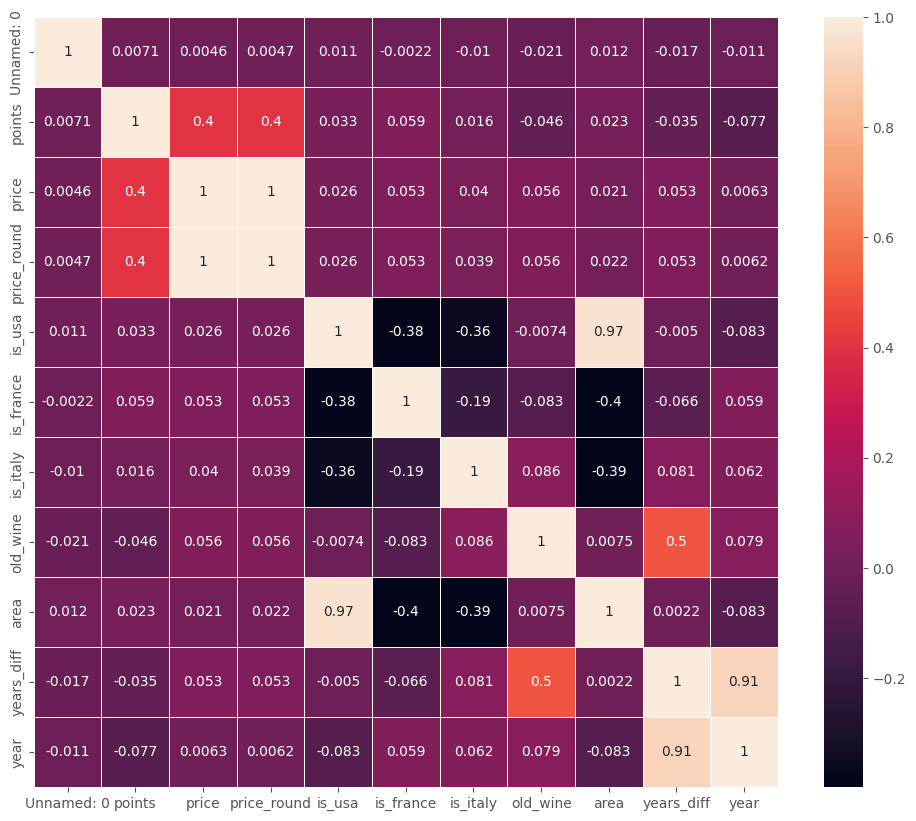

In [1084]:
fig,(ax)=plt.subplots(ncols=1,figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True),ax=ax,annot=True,linewidths=.5)



In [1085]:
data = data.drop(['is_usa', 'is_france', 'is_italy', 'price_round', 'area'], axis=1)

<Axes: >

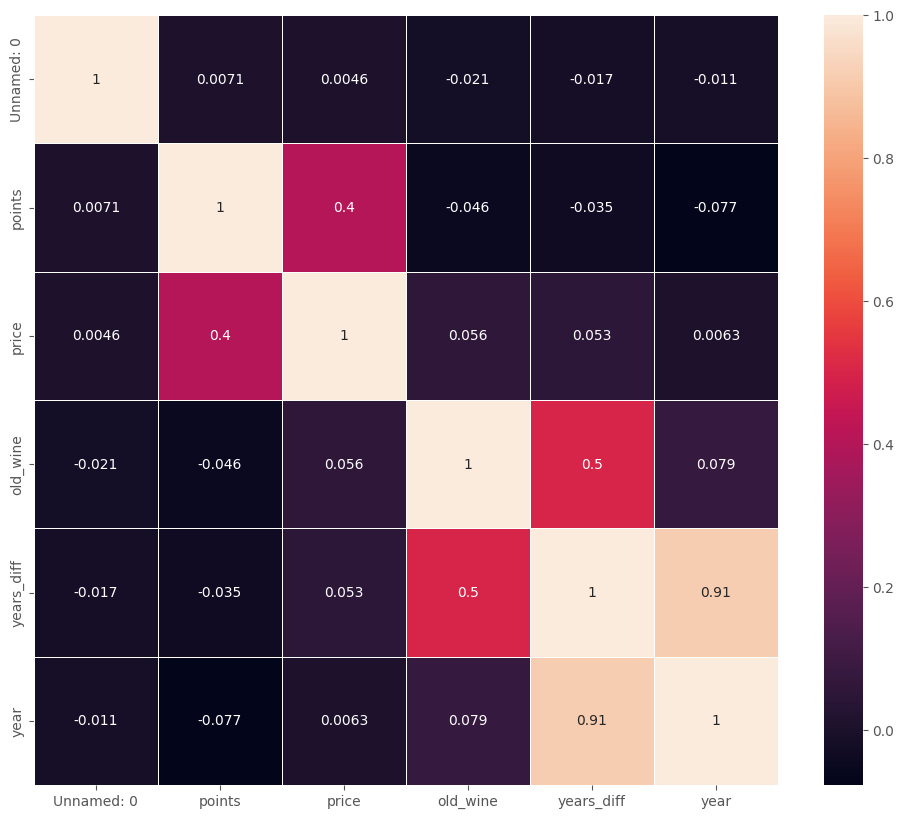

In [1086]:
fig,(ax1)=plt.subplots(ncols=1,figsize=(12,10))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax1)

<center>ИТОГОВАЯ ЗАДАЧА</center>

* Датасет болезней сердца содержит информацию о пациентах и переменную предсказания target — наличие у пациента болезни сердца.
Датасет содержит следующие признаки:

1. age — возраст
2. sex — пол (1 - мужчина, 0 - женщина)
3. cp — тип боли в груди (4 значения)
4. trestbps — артериальное давление в покое
5. chol — холестерин сыворотки в мг/дл
6. fbs — уровень сахара в крови натощак > 120 мг/дл
7. restecg — результаты электрокардиографии в покое (значения 0,1,2)
8. thalach — достигнута максимальная частота сердечных сокращений
9. exang — стенокардия, вызванная физической нагрузкой
10. oldpeak — депрессия ST, вызванная физической нагрузкой, по сравнению с состоянием покоя
11. slope — наклон пикового сегмента ST при нагрузке
12. ca — количество крупных сосудов (0-3), окрашенных при флюроскопии
13. thal — дефект, где 3 = нормальный; 6 = фиксированный дефект; 7 = обратимый дефект

* Задание 8.1
Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.В ответ введите результат выполнения кода heart['old'].sum().

In [1087]:
heart=pd.read_csv('heart.csv')

In [1088]:
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [1089]:
heart['old']=heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

* Задание 8.2 Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. trestbps — систолическое артериальное давление в состоянии покоя.


In [1090]:
display(len("""def func(x,y):
    if x <= 20 and y == 1:
        return 123
    elif  (x >= 21 and x <= 30) and y == 1:
        return 126
    elif  (x >= 31 and x <= 40) and y == 1:
        return 129
    elif  (x >= 41 and x <= 50) and y == 1:
        return 135
    elif  x >= 51  and y == 1:
        return 142
    elif x <= 20 and y == 2:
        return 116
    elif  (x >= 21 and x <= 30) and y == 0:
        return 120
    elif  (x >= 31 and x <= 40) and y == 0:
        return 127
    elif  (x >= 41 and x <= 50) and y == 0:
        return 137
    elif  x >= 51 and x<=60  and y == 0:
        return 144
    elif x>=61 and y==0:
        return 159"""))

heart['trestbps_mean']=heart.apply(lambda row:func(row['age'],row['sex']),axis=1)   

640

In [1091]:
heart['trestbps_mean'].iloc[300]

142

* 8.3 Проанализируйте датасет и выберите категориальные признаки.

In [1092]:
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in heart.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, heart[col].nunique(),heart[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,sex,2,int64
1,fbs,2,int64
2,exang,2,int64
3,target,2,int64
4,old,2,int64
5,restecg,3,int64
6,slope,3,int64
7,cp,4,int64
8,thal,4,int64
9,ca,5,int64


* Задание 8.4 Вышеперечисленные категориальные признаки уже представлены в числовом виде. Проанализируйте их и назовите те, которые нуждаются в дополнительном кодировании значений (например, OneHotEncoding).

In [1093]:
list(unique_counts.query('Num_Unique<15 & Num_Unique>2')['Column_Name'])

['restecg', 'slope', 'cp', 'thal', 'ca', 'trestbps_mean']

* Задание 8.5 Закодируйте вышеперечисленные признаки методом OneHotEncoding из библиотеки Category Encoders, удалив исходные признаки. Параметр use_cat_names оставьте по умолчанию. Сколько признаков получилось в датасете?

In [1094]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['restecg', 'slope', 'cp', 'thal', 'ca'])
bins=encoder.fit_transform(heart[['restecg', 'slope', 'cp', 'thal', 'ca']])
heart_new=pd.concat([heart,bins],axis=1)


In [1095]:
heart_new=heart_new.drop(['restecg', 'slope', 'cp', 'thal', 'ca'],axis=1)

In [1096]:
heart_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            303 non-null    int64  
 1   sex            303 non-null    int64  
 2   trestbps       303 non-null    int64  
 3   chol           303 non-null    int64  
 4   fbs            303 non-null    int64  
 5   thalach        303 non-null    int64  
 6   exang          303 non-null    int64  
 7   oldpeak        303 non-null    float64
 8   target         303 non-null    int64  
 9   old            303 non-null    int64  
 10  trestbps_mean  303 non-null    int64  
 11  restecg_1      303 non-null    int64  
 12  restecg_2      303 non-null    int64  
 13  restecg_3      303 non-null    int64  
 14  slope_1        303 non-null    int64  
 15  slope_2        303 non-null    int64  
 16  slope_3        303 non-null    int64  
 17  cp_1           303 non-null    int64  
 18  cp_2      

* 8.6 Нормализуйте все числовые признаки подходящим способом. В ответе напишите стандартное отклонение признака chol. Ответ округлите до шести знаков после запятой.

/tmp/ipykernel_4667/2343208268.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  heart.hist(ax=ax)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'old'}>,
        <Axes: title={'center': 'trestbps_mean'}>]], dtype=object)

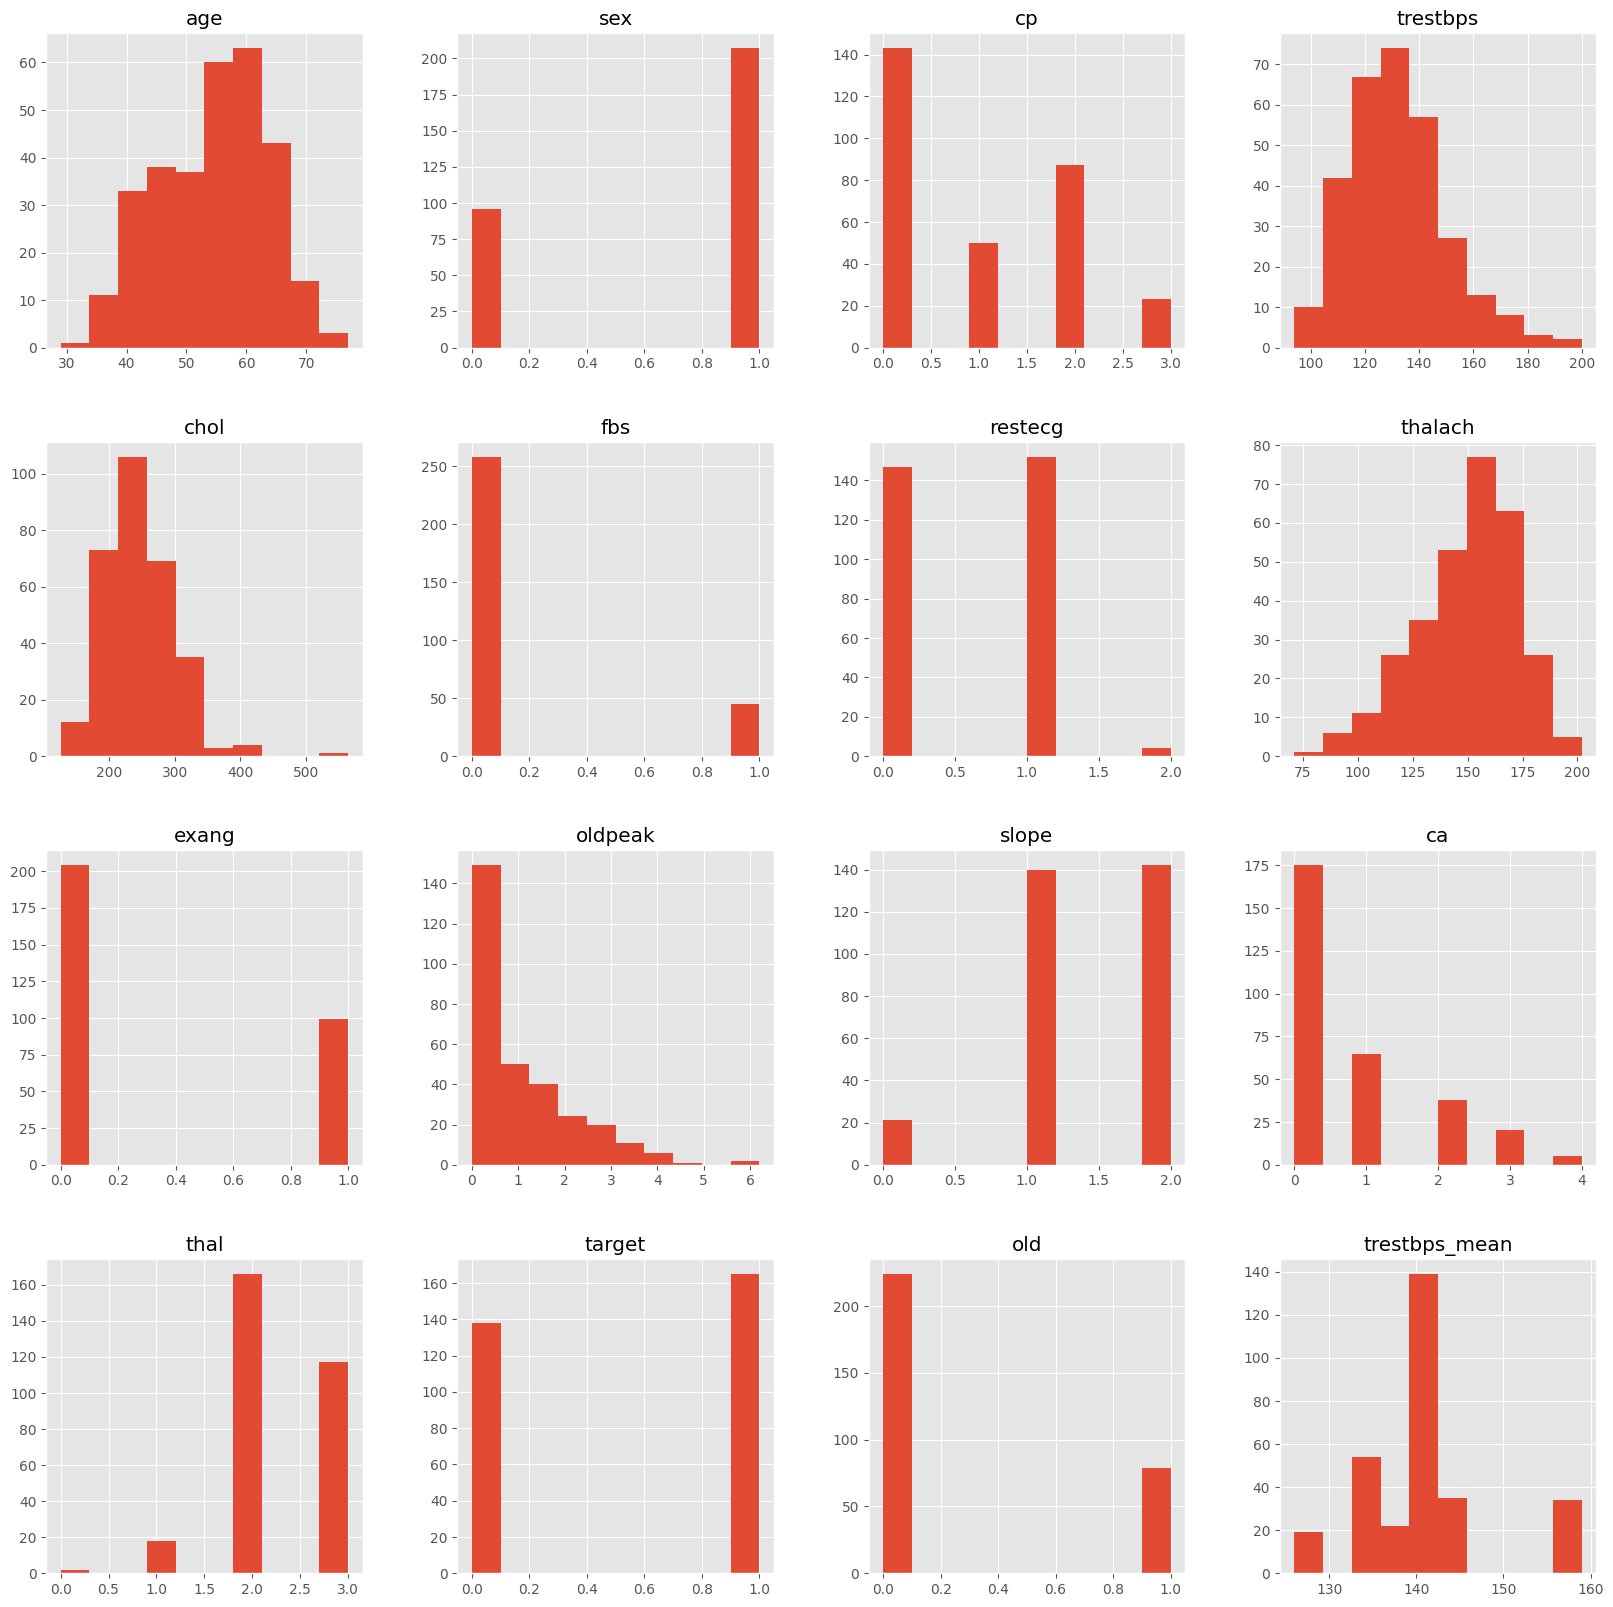

In [996]:
from sklearn import preprocessing

fig,(ax)=plt.subplots(ncols=1,figsize=(20,20))
heart.hist(ax=ax)

In [1014]:
from sklearn import preprocessing
colss=heart.columns
age_scaler=preprocessing.RobustScaler()
heart_new=age_scaler.fit_transform(heart)
heart_new=pd.DataFrame(heart_new,columns=colss)
heart_new

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,0.592593,0.0,1.0,0.75,-0.110236,1.0,-1.0,-0.092308,0.0,0.9375,-1.0,0.0,-1.0,0.0,1.0,0.0
1,-1.333333,0.0,0.5,0.00,0.157480,0.0,0.0,1.046154,0.0,1.6875,-1.0,0.0,0.0,0.0,0.0,-2.6
2,-1.037037,-1.0,0.0,0.00,-0.566929,0.0,-1.0,0.584615,0.0,0.3750,1.0,0.0,0.0,0.0,0.0,-1.0
3,0.074074,0.0,0.0,-0.50,-0.062992,0.0,0.0,0.769231,0.0,0.0000,1.0,0.0,0.0,0.0,0.0,0.0
4,0.148148,-1.0,-0.5,-0.50,1.795276,0.0,0.0,0.307692,1.0,-0.1250,1.0,0.0,0.0,0.0,0.0,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.148148,-1.0,-0.5,0.50,0.015748,0.0,0.0,-0.923077,1.0,-0.3750,0.0,0.0,1.0,-1.0,0.0,0.4
299,-0.740741,0.0,1.0,-1.00,0.377953,0.0,0.0,-0.646154,0.0,0.2500,0.0,0.0,1.0,-1.0,0.0,-1.4
300,0.962963,0.0,-0.5,0.70,-0.740157,1.0,0.0,-0.369231,0.0,1.6250,0.0,2.0,1.0,-1.0,1.0,0.0
301,0.148148,0.0,-0.5,0.00,-1.716535,0.0,0.0,-1.169231,1.0,0.2500,0.0,1.0,1.0,-1.0,0.0,0.0


* 8.7 Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков.

<Axes: >

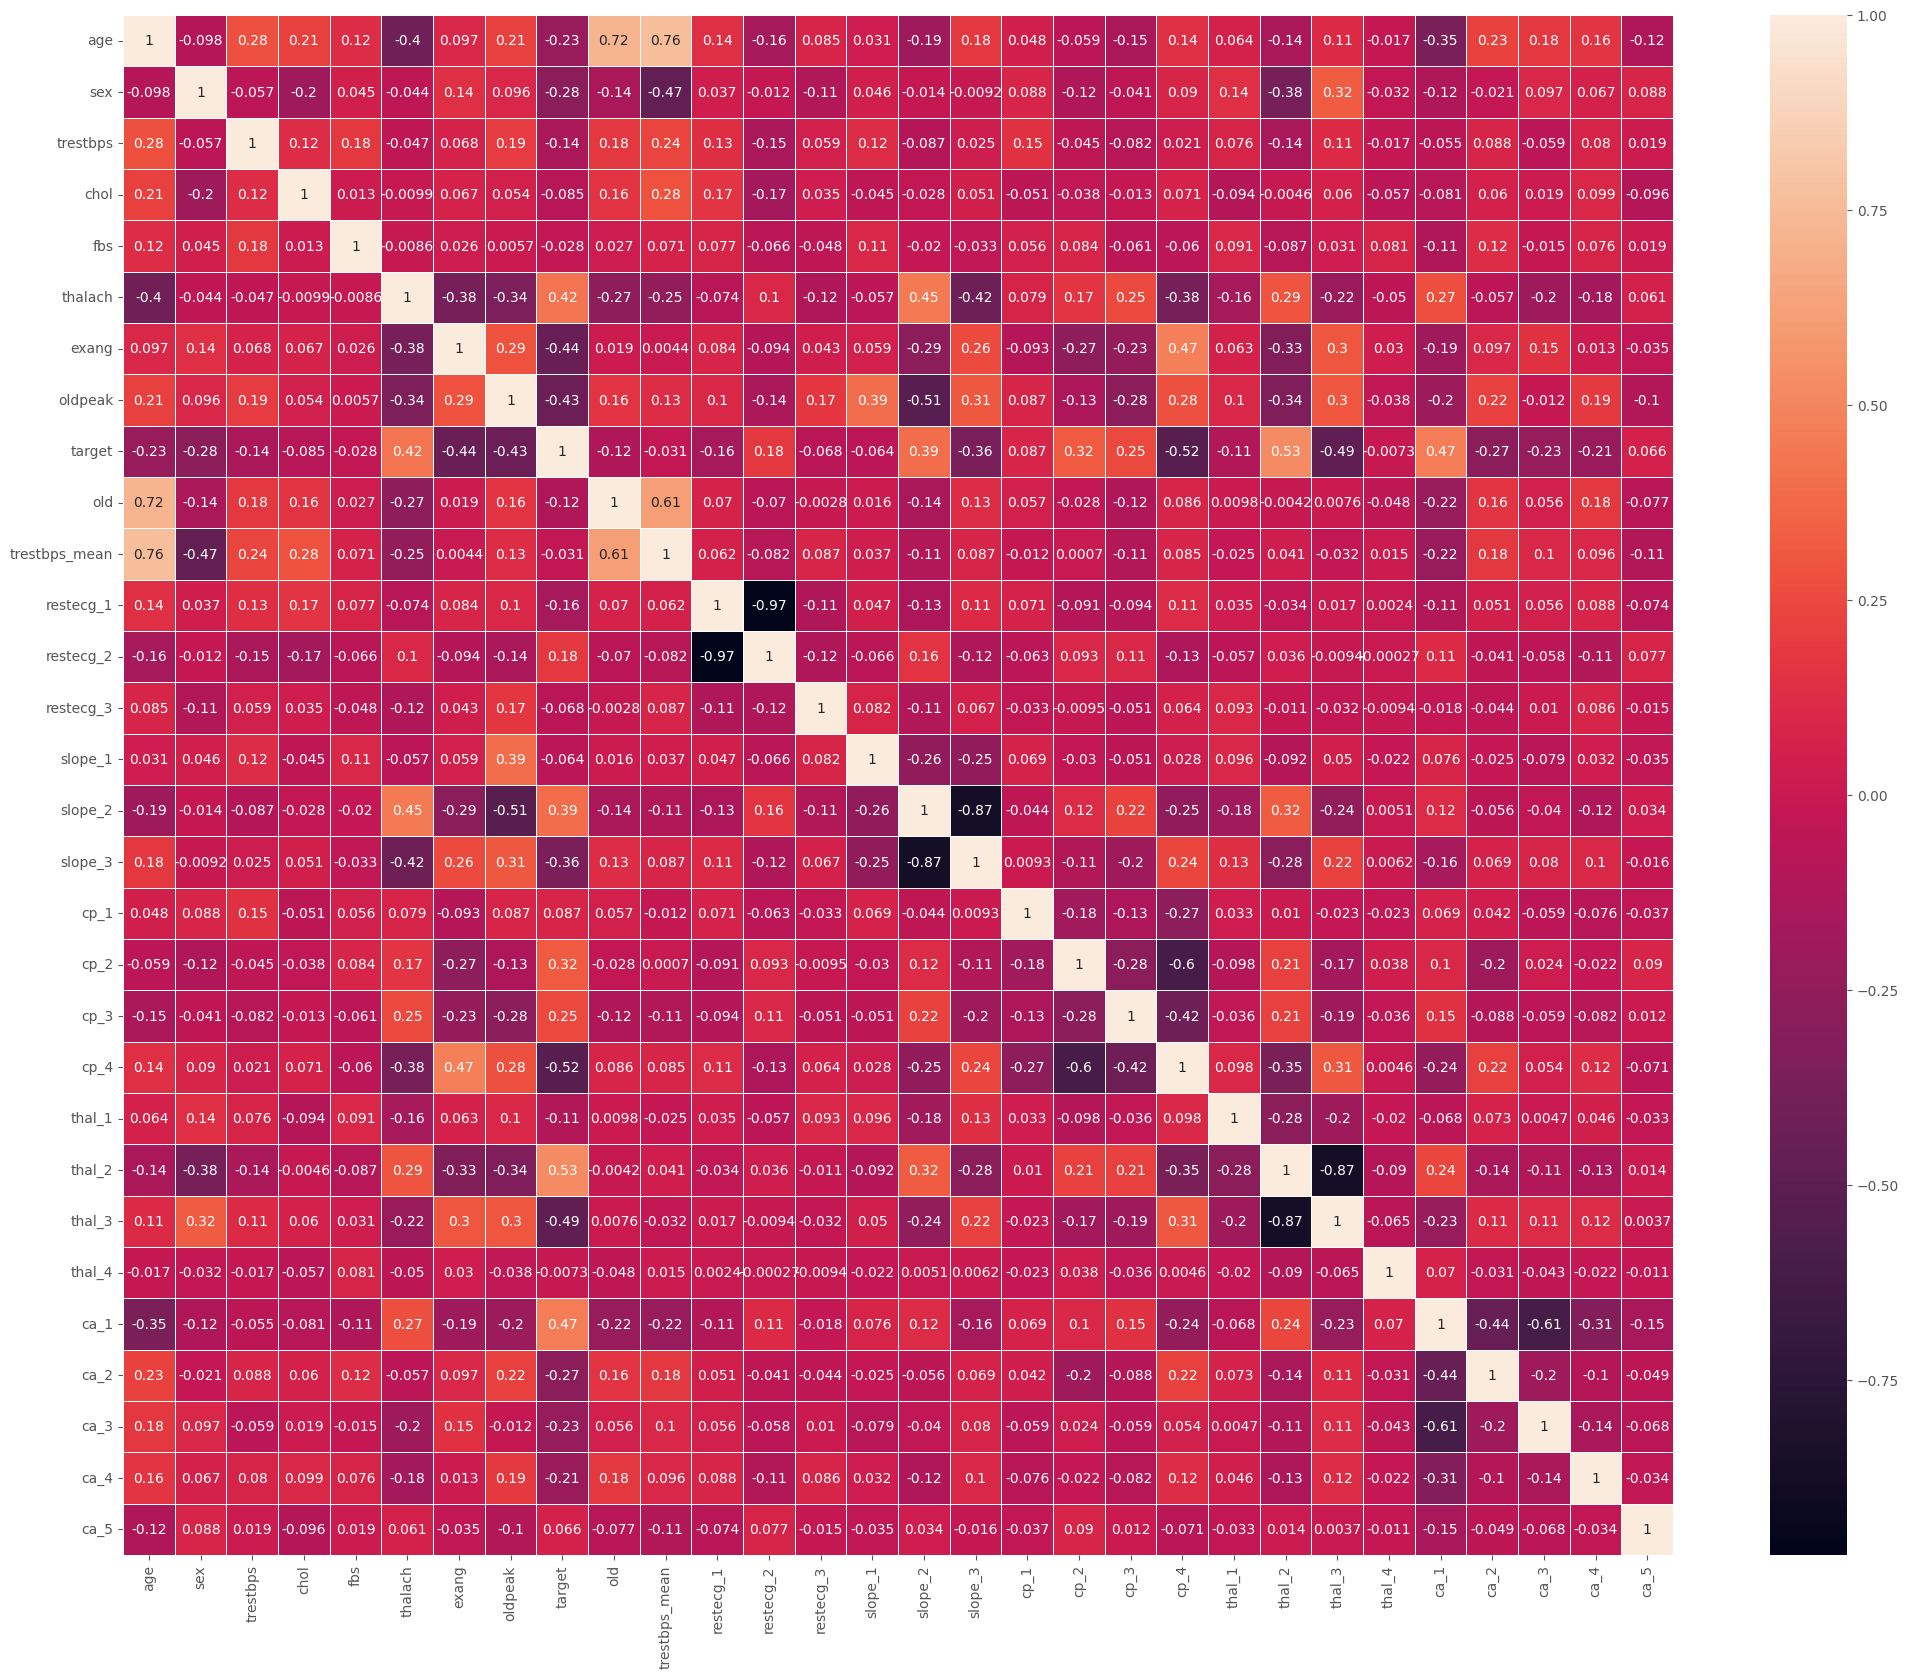

In [1099]:
corr_heart = heart_new.corr(numeric_only=True)
fig,(ax3)=plt.subplots(ncols=1,figsize=(25,20))
sns.heatmap(corr_heart,ax=ax3,linewidths=0.5, annot=True)